In [4]:
# import sys
# import logging

# so = open("data.log", 'w', 10)
# sys.stdout.echo = so
# sys.stderr.echo = so

# get_ipython().log.handlers[0].stream = so
# get_ipython().log.setLevel(logging.INFO)


In [5]:
#import packages
import matplotlib.pyplot as plt
#from cartopy import crs as ccrs, feature as cfeature
import xarray as xr
import pandas as pd
import numpy as np

# Packages needed for CESM1 example
import pprint
import intake
import requests
import aiohttp
import s3fs
import dask

In [6]:
# Open original collection description file: CESM1 LENS
cat_url = "https://ncar-cesm-lens.s3-us-west-2.amazonaws.com/catalogs/aws-cesm1-le.json"
# open the catalog using the intake function
col = intake.open_esm_datastore(cat_url)
#view the catalog
col

,unique
variable,78
long_name,75
component,5
experiment,4
frequency,6
vertical_levels,3
spatial_domain,5
units,25
start_time,12
end_time,13


In [7]:
# Get more detailed: search for monthly output for the 20th century and RCP8.5 
col_ocntemp = col.search(
    frequency=["monthly"],
    component="ocn",
    variable=["TEMP"],
    experiment=["HIST", "20C", "RCP85"],  # ("HIST" is the 1850-1919 period, which is only in the first ensemble member, and "20C" is 1920-2005 which is common across all the other members) 
)


# Get more detailed: search for monthly output for the 20th century and RCP8.5 
col_ocnO2 = col.search(
    frequency=["monthly"],
    component="ocn",
    variable=["O2"],
    experiment=["HIST", "20C", "RCP85"],  # ("HIST" is the 1850-1919 period, which is only in the first ensemble member, and "20C" is 1920-2005 which is common across all the other members) 
)


# Get more detailed: search for monthly output for the 20th century and RCP8.5 
col_ocnsalt = col.search(
    frequency=["monthly"],
    component="ocn",
    variable=["SALT"],
    experiment=["HIST", "20C", "RCP85"],  # ("HIST" is the 1850-1919 period, which is only in the first ensemble member, and "20C" is 1920-2005 which is common across all the other members) 
)


# Get more detailed: search for monthly output for the 20th century and RCP8.5 
col_ocnsst = col.search(
    frequency=["monthly"],
    component="ocn",
    variable=["SST"],
    experiment=["HIST", "20C", "RCP85"],  # ("HIST" is the 1850-1919 period, which is only in the first ensemble member, and "20C" is 1920-2005 which is common across all the other members) 
)


In [8]:
# Load catalog entries for subset into a dictionary of xarray datasets
dsets_temp = col_ocntemp.to_dataset_dict(
    zarr_kwargs={"consolidated": True}, 
    storage_options={"anon": True})

print(f"\nDataset dictionary keys:\n {dsets_temp.keys()}") #print to make sure we are getting the correct set of keys


# Load catalog entries for subset into a dictionary of xarray datasets
dsets_o2 = col_ocnO2.to_dataset_dict(
    zarr_kwargs={"consolidated": True}, 
    storage_options={"anon": True})

print(f"\nDataset dictionary keys:\n {dsets_o2.keys()}") #print to make sure we are getting the correct set of keys


# Load catalog entries for subset into a dictionary of xarray datasets
dsets_salt = col_ocnsalt.to_dataset_dict(
    zarr_kwargs={"consolidated": True}, 
    storage_options={"anon": True})

print(f"\nDataset dictionary keys:\n {dsets_salt.keys()}") #print to make sure we are getting the correct set of keys


# Load catalog entries for subset into a dictionary of xarray datasets
dsets_sst = col_ocnsst.to_dataset_dict(
    zarr_kwargs={"consolidated": True}, 
    storage_options={"anon": True})

print(f"\nDataset dictionary keys:\n {dsets_salt.keys()}") #print to make sure we are getting the correct set of keys


--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.frequency'



Dataset dictionary keys:
 dict_keys(['ocn.HIST.monthly', 'ocn.RCP85.monthly', 'ocn.20C.monthly'])

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.frequency'



Dataset dictionary keys:
 dict_keys(['ocn.20C.monthly', 'ocn.HIST.monthly', 'ocn.RCP85.monthly'])

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.frequency'



Dataset dictionary keys:
 dict_keys(['ocn.HIST.monthly', 'ocn.20C.monthly', 'ocn.RCP85.monthly'])

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.frequency'



Dataset dictionary keys:
 dict_keys(['ocn.HIST.monthly', 'ocn.20C.monthly', 'ocn.RCP85.monthly'])


In [9]:
# Define Xarray datasets corresponding to the two experiments
ds_20C_t = dsets_temp["ocn.20C.monthly"]
ds_RCP85_t = dsets_temp["ocn.RCP85.monthly"]



ds_20C_o = dsets_o2["ocn.20C.monthly"]
ds_RCP85_o = dsets_o2["ocn.RCP85.monthly"]



ds_20C_s = dsets_salt["ocn.20C.monthly"]
ds_RCP85_s = dsets_salt["ocn.RCP85.monthly"]



ds_20C_sst = dsets_salt["ocn.20C.monthly"]
ds_RCP85_sst = dsets_salt["ocn.RCP85.monthly"]


In [10]:
merge_ds_o = xr.concat([ds_20C_o, ds_RCP85_o], dim ='time')
merge_ds_t = xr.concat([ds_20C_t, ds_RCP85_t], dim ='time')
merge_ds_s = xr.concat([ds_20C_s, ds_RCP85_s], dim ='time')
merge_ds_sst = xr.concat([ds_20C_sst, ds_RCP85_sst], dim ='time')

In [11]:
#select just one point on the graph (this point is closest to channel islands)
test_2 = merge_ds_s.isel(nlat=(280), nlon=(240))

test_2

<xarray.Dataset> Size: 42MB
Dimensions:     (member_id: 40, time: 2172, z_t: 60, d2: 2)
Coordinates:
  * member_id   (member_id) int64 320B 1 2 3 4 5 6 7 ... 35 101 102 103 104 105
  * time        (time) object 17kB 1920-01-16 12:00:00 ... 2100-12-16 12:00:00
    time_bound  (time, d2) object 35kB dask.array<chunksize=(1032, 2), meta=np.ndarray>
  * z_t         (z_t) float32 240B 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
Dimensions without coordinates: d2
Data variables:
    SALT        (member_id, time, z_t) float64 42MB dask.array<chunksize=(1, 6, 60), meta=np.ndarray>
Attributes: (12/24)
    Conventions:                       CF-1.0; http://www.cgd.ucar.edu/cms/ea...
    calendar:                          All years have exactly  365 days.
    cell_methods:                      cell_methods = time: mean ==> the vari...
    contents:                          Diagnostic and Prognostic Variables
    nco_openmp_thread_number:          1
    nsteps_total:                      750
    ...                                ...
    intake_esm_attrs:units:            gram/kilogram
    intake_esm_attrs:start_time:       1920-01-16 12:00:00
    intake_esm_attrs:end_time:         2005-12-16 12:00:00
    intake_esm_attrs:path:             s3://ncar-cesm-lens/ocn/monthly/cesmLE...
    intake_esm_attrs:_data_format_:    zarr
    intake_esm_dataset_key:            ocn.20C.monthly

In [12]:
# %%time

# #create to nc file here:
# # save file - don't forget the .nc extension!
# test_2.to_netcdf('20C_rcp85_salt.nc')



In [13]:
# open to check:
check = xr.open_dataset('20C_rcp85_salt.nc'
)
check

<xarray.Dataset> Size: 42MB
Dimensions:     (member_id: 40, time: 2172, z_t: 60, d2: 2)
Coordinates:
  * member_id   (member_id) int64 320B 1 2 3 4 5 6 7 ... 35 101 102 103 104 105
  * time        (time) object 17kB 1920-01-16 12:00:00 ... 2100-12-16 12:00:00
    time_bound  (time, d2) object 35kB ...
  * z_t         (z_t) float32 240B 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
Dimensions without coordinates: d2
Data variables:
    SALT        (member_id, time, z_t) float64 42MB ...
Attributes: (12/24)
    Conventions:                       CF-1.0; http://www.cgd.ucar.edu/cms/ea...
    calendar:                          All years have exactly  365 days.
    cell_methods:                      cell_methods = time: mean ==> the vari...
    contents:                          Diagnostic and Prognostic Variables
    nco_openmp_thread_number:          1
    nsteps_total:                      750
    ...                                ...
    intake_esm_attrs:units:            gram/kilogram
    intake_esm_attrs:start_time:       1920-01-16 12:00:00
    intake_esm_attrs:end_time:         2005-12-16 12:00:00
    intake_esm_attrs:path:             s3://ncar-cesm-lens/ocn/monthly/cesmLE...
    intake_esm_attrs:_data_format_:    zarr
    intake_esm_dataset_key:            ocn.20C.monthly

In [17]:
test_2000 = check.sel(time=slice("1920", "2000"))

#select the TEMP column and set z_t, which is depth to 0 for sea surface temeperature
point_2 = test_2000.SALT.sel(z_t = 0, method = "nearest")

#select a member_id
mean_id = point_2.mean("member_id")
max_id = point_2.max("member_id")
min_id = point_2.min("member_id")

In [24]:
time = mean_id.indexes['time'].to_datetimeindex()

C:\Users\patty\AppData\Local\Temp\ipykernel_10796\958782058.py:1: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  time = mean_id.indexes['time'].to_datetimeindex()


Text(0.5, 1.0, 'Mean Salinity Time Series')

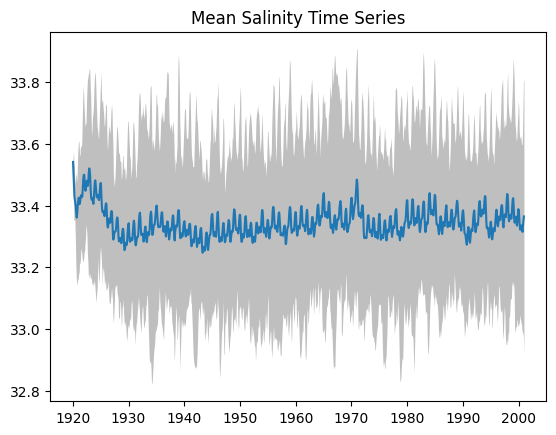

In [34]:
# plot
fig, ax = plt.subplots()

ax.plot(time, mean_id)
ax.fill_between(time, min_id, max_id, alpha=.5, linewidth=0, color = 'gray')

plt.title("Mean Salinity Time Series")
